In [1]:
# impot library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get Data
url = 'https://raw.githubusercontent.com/rawisara01/DSI314/main/Gradient%20boosting%20classifier/combined_files.csv'
df =pd.read_csv(url)

In [3]:
df

,Unnamed: 0,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,สายทาง,จังหวัด,ประเภทรถ,บริเวณที่เกิดเหตุ/ลักษณะทาง,ลักษณะการเกิดอุบัติเหตุ,จำนวนรถที่เกิดเหตุ (รวมคันที่ 1),จำนวนผู้เสียชีวิต,รวมจำนวนผู้บาดเจ็บ,สภาพอากาศ
0,0,2019,1/1/2019,3:05,บางพลี-สุขสวัสดิ์,กรุงเทพมหานคร,NaN,อื่นๆ,NaN,1,0,1,แจ่มใส
1,1,2019,1/1/2019,5:42,บางนา-ชลบุรี,กรุงเทพมหานคร,อื่นๆ,ทางตรง,NaN,1,0,0,แจ่มใส
2,2,2019,1/1/2019,10:10,ดาวคะนอง - แสมดำ,กรุงเทพมหานคร,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,2,0,0,แจ่มใส
3,3,2019,1/1/2019,17:30,อรุณอมรินทร์ - พุทธมณฑลสาย 4,กรุงเทพมหานคร,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,2,0,0,แจ่มใส
4,4,2019,1/1/2019,19:20,อรุณอมรินทร์ - พุทธมณฑลสาย 4,กรุงเทพมหานคร,รถปิคอัพบรรทุก 4 ล้อ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,2,0,1,แจ่มใส
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,5727,2022,29/9/2022,23:40,รามอินทรา-อาจณรงค์,กรุงเทพมหานคร,NaN,ทางตรง,อื่นๆ,1,0,0,ฝนตก
5728,5728,2022,30/9/2022,9:21,แจ้งวัฒนะ-พญาไท,กรุงเทพมหานคร,NaN,ทางโค้งกว้าง,ชนสิ่งกีดขวาง (บนผิวจราจร),1,0,0,แจ่มใส
5729,5729,2022,30/9/2022,18:04,แขวงคลองสองต้นนุ่น - พิมพา,กรุงเทพมหานคร,รถปิคอัพบรรทุก 4 ล้อ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,3,0,0,แจ่มใส
5730,5730,2022,30/9/2022,18:48,รามอินทรา-อาจณรงค์,กรุงเทพมหานคร,NaN,ทางตรง,ชนท้าย,4,0,0,แจ่มใส


In [4]:
# ลบคอลัมน์ที่ไม่ได้ใช้งาน
df.drop(['Unnamed: 0', 'ปีที่เกิดเหตุ', 'ลักษณะการเกิดอุบัติเหตุ', 'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)', 'จังหวัด'], inplace=True, axis=1)

In [5]:
#เปลี่ยนชื่อคอลัมน์
df.rename(columns = {'วันที่เกิดเหตุ':'date_acc', 
                     'เวลา':'time_acc', 
                     'สายทาง':'route_acc', 
                     'ประเภทรถ':'type_acc', 
                     'บริเวณที่เกิดเหตุ/ลักษณะทาง':'scene/road surface', 
                     'จำนวนผู้เสียชีวิต':'num_death', 
                     'รวมจำนวนผู้บาดเจ็บ':'num_injured', 
                     'สภาพอากาศ':'climate_acc'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_acc            5732 non-null   object
 1   time_acc            5732 non-null   object
 2   route_acc           5725 non-null   object
 3   type_acc            5060 non-null   object
 4   scene/road surface  5312 non-null   object
 5   num_death           5732 non-null   int64 
 6   num_injured         5732 non-null   int64 
 7   climate_acc         5732 non-null   object
dtypes: int64(2), object(6)
memory usage: 358.4+ KB


#Data Preprocessing

In [9]:
# แยก date_acc และสร้างคอลัมน์ date_acc, 'month_acc', 'years_acc'
df[['day_acc', 'month_acc', 'years_acc']] = df['date_acc'].str.split('/', expand=True)
df = df.drop(columns=["date_acc"])

# แยก time_acc และสร้างคอลัมน์ hours_acc, minutes_acc 
df[['hours_acc', 'minutes_acc']] = df['time_acc'].str.split(':', expand=True)
df = df.drop(columns=["time_acc"])

# แยก scene/road surface และสร้างคอลัมน์ 'scene_acc', 'road_surface'
df[['scene_acc', 'road_surface']] = df['scene/road surface'].str.split('+', expand=True)
df = df.drop(columns=["scene/road surface"])
df

,route_acc,type_acc,num_death,num_injured,climate_acc,day_acc,month_acc,years_acc,hours_acc,minutes_acc,scene_acc,road_surface
0,บางพลี-สุขสวัสดิ์,NaN,0,1,แจ่มใส,1,1,2019,3,05,อื่นๆ,None
1,บางนา-ชลบุรี,อื่นๆ,0,0,แจ่มใส,1,1,2019,5,42,ทางตรง,None
2,ดาวคะนอง - แสมดำ,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,0,0,แจ่มใส,1,1,2019,10,10,ทางตรง,ไม่มีความลาดชัน
3,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,0,0,แจ่มใส,1,1,2019,17,30,ทางตรง,ไม่มีความลาดชัน
4,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถปิคอัพบรรทุก 4 ล้อ,0,1,แจ่มใส,1,1,2019,19,20,ทางตรง,ไม่มีความลาดชัน
...,...,...,...,...,...,...,...,...,...,...,...,...
5727,รามอินทรา-อาจณรงค์,NaN,0,0,ฝนตก,29,9,2022,23,40,ทางตรง,None
5728,แจ้งวัฒนะ-พญาไท,NaN,0,0,แจ่มใส,30,9,2022,9,21,ทางโค้งกว้าง,None
5729,แขวงคลองสองต้นนุ่น - พิมพา,รถปิคอัพบรรทุก 4 ล้อ,0,0,แจ่มใส,30,9,2022,18,04,ทางตรง,ไม่มีความลาดชัน
5730,รามอินทรา-อาจณรงค์,NaN,0,0,แจ่มใส,30,9,2022,18,48,ทางตรง,None


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   route_acc     5725 non-null   object
 1   type_acc      5060 non-null   object
 2   num_death     5732 non-null   int64 
 3   num_injured   5732 non-null   int64 
 4   climate_acc   5732 non-null   object
 5   day_acc       5732 non-null   object
 6   month_acc     5732 non-null   object
 7   years_acc     5732 non-null   object
 8   hours_acc     5732 non-null   object
 9   minutes_acc   5732 non-null   object
 10  scene_acc     5312 non-null   object
 11  road_surface  4422 non-null   object
dtypes: int64(2), object(10)
memory usage: 537.5+ KB


In [11]:
# แปลงข้อมูลให้เป็น int ตามความเหมาะสม
df[['hours_acc', 'minutes_acc']] = df[['hours_acc', 'minutes_acc']].astype(str).astype(int)

In [12]:
# สร้างเงื่อนไขสำหรับช่วงเวลา
conditions_time = [
    (df['hours_acc'] >= 0) & (df['hours_acc'] <= 4),
    (df['hours_acc'] >= 5) & (df['hours_acc'] <= 9),
    (df['hours_acc'] >= 10) & (df['hours_acc'] <= 14),
    (df['hours_acc'] >= 15) & (df['hours_acc'] <= 19),
    (df['hours_acc'] >= 20) & (df['hours_acc'] <= 24)
    ]

# แบ่งช่วงเวลา
values_time = ['0', '1', '2', '3', '4']

# สร้างคอลัมน์ time
df['time_acc'] = np.select(conditions_time, values_time)

In [13]:
# สร้างเงื่อนไขสำหรับระดับความรุนแรง
conditions_acc = [
    (df['num_injured'] <= 0) & (df['num_death'] <= 0),
    (df['num_injured'] > 0) & (df['num_death'] <= 0),
    (df['num_injured'] >= 0) & (df['num_death'] > 0),
    ]

# แบ่งระดับความรุนแรง
values_acc = [ 'ACC', 'INJ', 'DIE' ]

# สร้างคอลลัมน์ Level_acc
df['level_acc'] = np.select(conditions_acc, values_acc)

df = df.drop(columns=["num_injured"])
df = df.drop(columns=["num_death"])

In [14]:
df.dtypes

route_acc       object
type_acc        object
climate_acc     object
day_acc         object
month_acc       object
years_acc       object
hours_acc        int64
minutes_acc      int64
scene_acc       object
road_surface    object
time_acc        object
level_acc       object
dtype: object

--------------------------------------------------------------------

#Exploratory Data Analysis (EDA)

In [16]:
# copy df to df_EDA
df_EDA = df.copy()

# ลบคอลัมน์ที่ไม่ใช้งาน
df_EDA.drop('route_acc', inplace=True, axis=1)

In [18]:
# โหลด font ภาษาไทยสำหรับการ plot กราฟ
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
 
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [19]:
# สร้างฟังก์ชันสำหรับกราฟแท่ง
def val_count_BarPlot(data=None, count_cols=None):
      data_count = data[count_cols].value_counts()
      fig, ax = plt.subplots(figsize=(8, 6))
      pbar = ax.bar(data_count.index.astype(str), data_count.values)
      # ax.bar_label(pbar, [num for num in data_count.values])
      ax.set_title(f"{count_cols} values count")
      plt.show

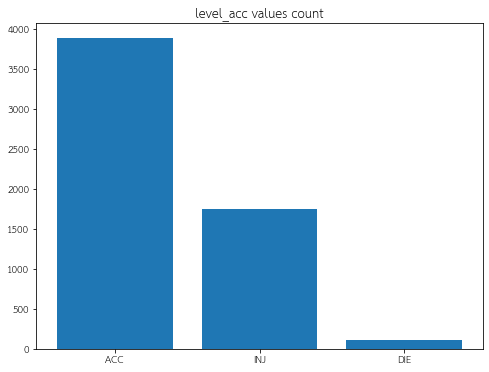

In [20]:
# กราฟแท่งของระดับความรุนแรง
val_count_BarPlot(data=df_EDA, count_cols='level_acc')

In [21]:
# จำนวนของระดับความรุนแรง
df_EDA.level_acc.value_counts()

ACC    3884
INJ    1744
DIE     104
Name: level_acc, dtype: int64

แจ่มใส level_acc
ACC    3513
INJ    1560
DIE      96
Name: level_acc, dtype: int64 

ฝนตก level_acc
ACC    365
INJ    174
DIE      4
Name: level_acc, dtype: int64 

มืดครึ้ม level_acc
INJ    7
DIE    4
ACC    2
Name: level_acc, dtype: int64 

อื่นๆ level_acc
ACC    4
INJ    3
Name: level_acc, dtype: int64 



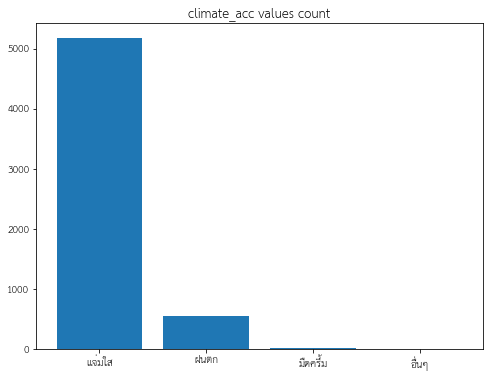

In [22]:
#กราฟแท่งของคอลัมน์ climate
val_count_BarPlot(data=df_EDA, count_cols='climate_acc')

# climate เทียบกับ level_acc
for val in list(df['climate_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['climate_acc']==val]['level_acc'].value_counts(),"\n")

1 level_acc
ACC    146
INJ     53
DIE      6
Name: level_acc, dtype: int64 

2 level_acc
ACC    133
INJ     57
DIE      4
Name: level_acc, dtype: int64 

3 level_acc
ACC    114
INJ     54
DIE      3
Name: level_acc, dtype: int64 

4 level_acc
ACC    128
INJ     55
DIE      2
Name: level_acc, dtype: int64 

5 level_acc
ACC    121
INJ     53
DIE      3
Name: level_acc, dtype: int64 

6 level_acc
ACC    115
INJ     58
DIE      7
Name: level_acc, dtype: int64 

7 level_acc
ACC    123
INJ     65
DIE      3
Name: level_acc, dtype: int64 

8 level_acc
ACC    127
INJ     46
DIE      3
Name: level_acc, dtype: int64 

9 level_acc
ACC    149
INJ     59
DIE      5
Name: level_acc, dtype: int64 

10 level_acc
ACC    139
INJ     55
DIE      2
Name: level_acc, dtype: int64 

11 level_acc
ACC    122
INJ     58
DIE      5
Name: level_acc, dtype: int64 

12 level_acc
ACC    122
INJ     56
DIE      3
Name: level_acc, dtype: int64 

13 level_acc
ACC    120
INJ     52
DIE      3
Name: level_acc, dtype: int

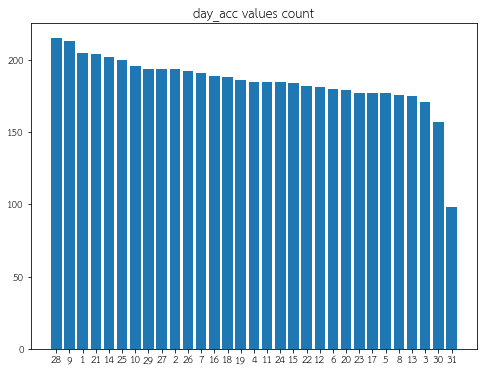

In [23]:
#กราฟแท่งของคอลัมน์ day_acc
val_count_BarPlot(data=df_EDA, count_cols='day_acc')

# day_acc เทียบกับ level_acc
for val in list(df['day_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['day_acc']==val]['level_acc'].value_counts(),"\n")

1 level_acc
ACC    326
INJ    161
DIE     12
Name: level_acc, dtype: int64 

2 level_acc
ACC    333
INJ    149
DIE      4
Name: level_acc, dtype: int64 

3 level_acc
ACC    377
INJ    151
DIE      7
Name: level_acc, dtype: int64 

4 level_acc
ACC    332
INJ    172
DIE     13
Name: level_acc, dtype: int64 

5 level_acc
ACC    331
INJ    131
DIE     11
Name: level_acc, dtype: int64 

6 level_acc
ACC    315
INJ    110
DIE      5
Name: level_acc, dtype: int64 

7 level_acc
ACC    357
INJ    164
DIE      9
Name: level_acc, dtype: int64 

8 level_acc
ACC    336
INJ    154
DIE      8
Name: level_acc, dtype: int64 

9 level_acc
ACC    379
INJ    154
DIE      8
Name: level_acc, dtype: int64 

10 level_acc
ACC    290
INJ    136
DIE     10
Name: level_acc, dtype: int64 

11 level_acc
ACC    246
INJ    101
DIE      8
Name: level_acc, dtype: int64 

12 level_acc
ACC    262
INJ    161
DIE      9
Name: level_acc, dtype: int64 



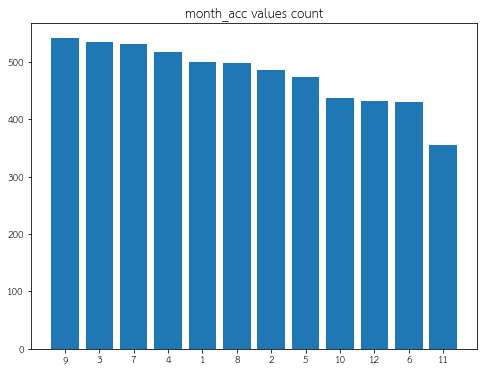

In [24]:
#กราฟแท่งของคอลัมน์ month_acc
val_count_BarPlot(data=df_EDA, count_cols='month_acc')

# month_acc เทียบกับ level_acc
for val in list(df['month_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['month_acc']==val]['level_acc'].value_counts(),"\n")

2019 level_acc
ACC    994
INJ    408
DIE     20
Name: level_acc, dtype: int64 

2020 level_acc
ACC    1036
INJ     523
DIE      26
Name: level_acc, dtype: int64 

2021 level_acc
ACC    985
INJ    422
DIE     35
Name: level_acc, dtype: int64 

2022 level_acc
ACC    869
INJ    391
DIE     23
Name: level_acc, dtype: int64 



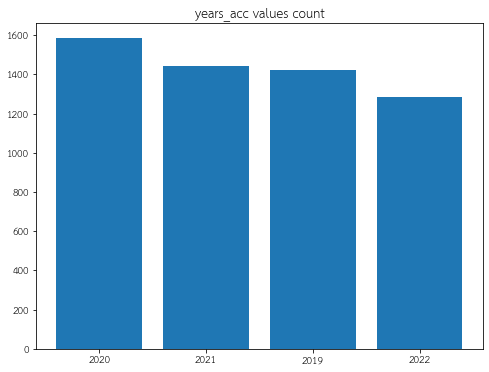

In [25]:
#กราฟแท่งของคอลัมน์ years_acc
val_count_BarPlot(data=df_EDA, count_cols='years_acc')

# years_acc เทียบกับ level_acc
for val in list(df['years_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['years_acc']==val]['level_acc'].value_counts(),"\n")

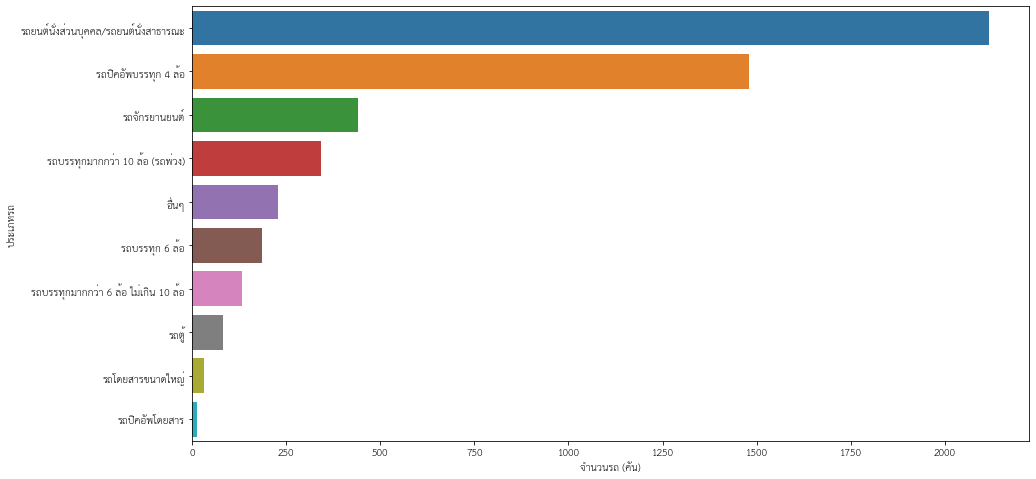

In [26]:
#กราฟแท่งของคอลัมน์ type_acc
type_acc = df_EDA['type_acc'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.countplot(data=df_EDA, y='type_acc', order=type_acc)
plt.xlabel('จำนวนรถ (คัน)')
plt.ylabel('ประเภทรถ');

In [27]:
# type_acc เทียบกับ level_acc
for val in list(df['type_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['type_acc']==val]['level_acc'].value_counts(),"\n")

nan level_acc
Series([], Name: level_acc, dtype: int64) 

อื่นๆ level_acc
ACC    211
INJ     14
DIE      3
Name: level_acc, dtype: int64 

รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ level_acc
ACC    1478
INJ     620
DIE      19
Name: level_acc, dtype: int64 

รถปิคอัพบรรทุก 4 ล้อ level_acc
ACC    1043
INJ     424
DIE      12
Name: level_acc, dtype: int64 

รถตู้ level_acc
ACC    47
INJ    32
DIE     3
Name: level_acc, dtype: int64 

รถบรรทุก 6 ล้อ level_acc
ACC    128
INJ     48
DIE     10
Name: level_acc, dtype: int64 

รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง) level_acc
ACC    237
INJ    101
DIE      4
Name: level_acc, dtype: int64 

รถโดยสารขนาดใหญ่ level_acc
ACC    24
INJ     6
DIE     1
Name: level_acc, dtype: int64 

รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ level_acc
ACC    87
INJ    42
DIE     4
Name: level_acc, dtype: int64 

รถจักรยานยนต์ level_acc
INJ    275
ACC    127
DIE     38
Name: level_acc, dtype: int64 

รถปิคอัพโดยสาร level_acc
INJ    7
ACC    6
Name: level_acc, dtype: int64 

รถสามล้อเ

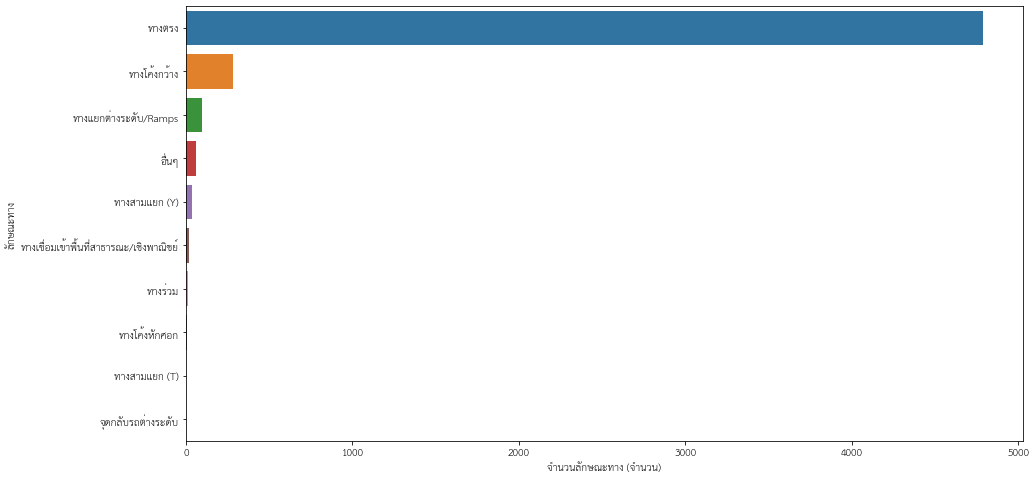

In [28]:
#กราฟแท่งของคอลัมน์ scene_acc
scene_acc = df_EDA['scene_acc'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.countplot(data=df_EDA, y='scene_acc', order=scene_acc)
plt.xlabel('จำนวนลักษณะทาง (จำนวน)')
plt.ylabel('ลักษณะทาง');

In [29]:
# scene_acc เทียบกับ level_acc
for val in list(df['scene_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['scene_acc']==val]['level_acc'].value_counts(),"\n")

อื่นๆ level_acc
ACC    55
INJ     6
DIE     1
Name: level_acc, dtype: int64 

ทางตรง level_acc
ACC    3235
INJ    1479
DIE      75
Name: level_acc, dtype: int64 

ทางโค้งกว้าง level_acc
ACC    191
INJ     85
DIE      7
Name: level_acc, dtype: int64 

nan level_acc
Series([], Name: level_acc, dtype: int64) 

ทางแยกต่างระดับ/Ramps level_acc
ACC    63
INJ    30
DIE     3
Name: level_acc, dtype: int64 

ทางเชื่อมเข้าพื้นที่สาธารณะ/เชิงพาณิชย์ level_acc
ACC    10
INJ     6
DIE     1
Name: level_acc, dtype: int64 

ทางโค้งหักศอก level_acc
ACC    7
INJ    1
DIE    1
Name: level_acc, dtype: int64 

ทางสามแยก (Y) level_acc
ACC    31
INJ     6
Name: level_acc, dtype: int64 

ทางร่วม level_acc
ACC    9
INJ    4
Name: level_acc, dtype: int64 

ทางสามแยก (T) level_acc
ACC    2
Name: level_acc, dtype: int64 

จุดกลับรถต่างระดับ level_acc
ACC    2
Name: level_acc, dtype: int64 

ทางเชื่อมเข้าพื้นที่ส่วนบุคคล level_acc
INJ    1
Name: level_acc, dtype: int64 

ทางสี่แยก level_acc
INJ    1
Name: level_a

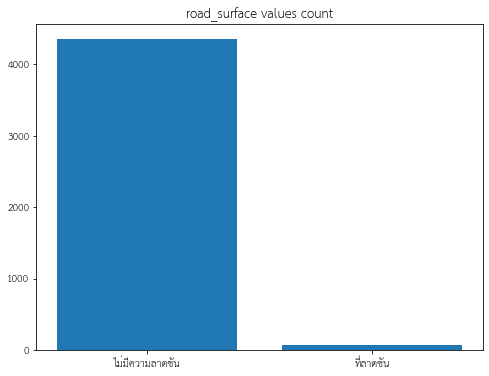

In [30]:
#กราฟแท่งของคอลัมน์ road_surface
val_count_BarPlot(data=df_EDA, count_cols='road_surface')

In [31]:
# road_surface เทียบกับ level_acc
for val in list(df['road_surface'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['road_surface']==val]['level_acc'].value_counts(),"\n")

None level_acc
Series([], Name: level_acc, dtype: int64) 

ไม่มีความลาดชัน level_acc
ACC    2941
INJ    1343
DIE      66
Name: level_acc, dtype: int64 

nan level_acc
Series([], Name: level_acc, dtype: int64) 

ที่ลาดชัน level_acc
INJ    35
ACC    29
DIE     8
Name: level_acc, dtype: int64 



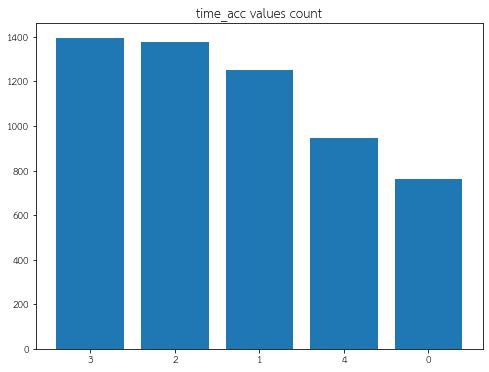

In [32]:
#กราฟแท่งของคอลัมน์ time_acc
val_count_BarPlot(data=df_EDA, count_cols='time_acc')

In [33]:
# time_acc เทียบกับ level_acc
for val in list(df['time_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['time_acc']==val]['level_acc'].value_counts(),"\n")

0 level_acc
ACC    422
INJ    312
DIE     28
Name: level_acc, dtype: int64 

1 level_acc
ACC    878
INJ    349
DIE     24
Name: level_acc, dtype: int64 

2 level_acc
ACC    1012
INJ     354
DIE      12
Name: level_acc, dtype: int64 

3 level_acc
ACC    1006
INJ     378
DIE      10
Name: level_acc, dtype: int64 

4 level_acc
ACC    566
INJ    351
DIE     30
Name: level_acc, dtype: int64 



---------------------------------------------

### Heatmap (correlation)

In [34]:
# copy df ลงใน Htm
df_Htm = df.copy()

In [35]:
df_Htm

,route_acc,type_acc,climate_acc,day_acc,month_acc,years_acc,hours_acc,minutes_acc,scene_acc,road_surface,time_acc,level_acc
0,บางพลี-สุขสวัสดิ์,NaN,แจ่มใส,1,1,2019,3,5,อื่นๆ,None,0,INJ
1,บางนา-ชลบุรี,อื่นๆ,แจ่มใส,1,1,2019,5,42,ทางตรง,None,1,ACC
2,ดาวคะนอง - แสมดำ,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,แจ่มใส,1,1,2019,10,10,ทางตรง,ไม่มีความลาดชัน,2,ACC
3,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,แจ่มใส,1,1,2019,17,30,ทางตรง,ไม่มีความลาดชัน,3,ACC
4,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถปิคอัพบรรทุก 4 ล้อ,แจ่มใส,1,1,2019,19,20,ทางตรง,ไม่มีความลาดชัน,3,INJ
...,...,...,...,...,...,...,...,...,...,...,...,...
5727,รามอินทรา-อาจณรงค์,NaN,ฝนตก,29,9,2022,23,40,ทางตรง,None,4,ACC
5728,แจ้งวัฒนะ-พญาไท,NaN,แจ่มใส,30,9,2022,9,21,ทางโค้งกว้าง,None,1,ACC
5729,แขวงคลองสองต้นนุ่น - พิมพา,รถปิคอัพบรรทุก 4 ล้อ,แจ่มใส,30,9,2022,18,4,ทางตรง,ไม่มีความลาดชัน,3,ACC
5730,รามอินทรา-อาจณรงค์,NaN,แจ่มใส,30,9,2022,18,48,ทางตรง,None,3,ACC


In [36]:
# ลบคอลัมน์ที่ไม่ใช้งาน
df_Htm.drop('route_acc', inplace=True, axis=1)

In [37]:
# ตรวจสอบชนิดข้อมูลเบื้องต้น
df_Htm.dtypes

type_acc        object
climate_acc     object
day_acc         object
month_acc       object
years_acc       object
hours_acc        int64
minutes_acc      int64
scene_acc       object
road_surface    object
time_acc        object
level_acc       object
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
#create instance of label encoder
lab = LabelEncoder()

# encode
df_Htm['type_acc'] = lab.fit_transform(df_Htm['type_acc'])
df_Htm['climate_acc'] = lab.fit_transform(df_Htm['climate_acc'])
df_Htm['scene_acc'] = lab.fit_transform(df_Htm['scene_acc'])
df_Htm['road_surface'] = lab.fit_transform(df_Htm['road_surface'])
df_Htm['level_acc'] = lab.fit_transform(df_Htm['level_acc'])

In [39]:
# แปลงข้อมูลให้เป็น int
df_Htm[['day_acc', 'month_acc', 'years_acc', 'time_acc']] = df_Htm[['day_acc', 'month_acc', 'years_acc', 'time_acc']].astype(str).astype(int)

In [40]:
df_Htm.dtypes

type_acc        int64
climate_acc     int64
day_acc         int64
month_acc       int64
years_acc       int64
hours_acc       int64
minutes_acc     int64
scene_acc       int64
road_surface    int64
time_acc        int64
level_acc       int64
dtype: object

In [41]:
# ดูค่า corr()
df_Htm.corr()

,type_acc,climate_acc,day_acc,month_acc,years_acc,hours_acc,minutes_acc,scene_acc,road_surface,time_acc,level_acc
type_acc,1.000000,0.015734,-0.005764,-0.004819,0.229018,-0.004123,0.018901,0.058117,0.238558,-0.006818,-0.177682
climate_acc,0.015734,1.000000,-0.019446,-0.066497,-0.084794,-0.024731,-0.026741,-0.067976,-0.028407,-0.029778,-0.012168
day_acc,-0.005764,-0.019446,1.000000,0.078434,0.009894,0.013650,0.017400,0.020602,0.019155,0.014646,0.010523
month_acc,-0.004819,-0.066497,0.078434,1.000000,-0.065149,0.008231,0.005364,-0.018820,-0.023988,0.004935,0.012224
years_acc,0.229018,-0.084794,0.009894,-0.065149,1.000000,-0.007338,0.083641,0.114000,0.210516,-0.003917,0.005653
hours_acc,-0.004123,-0.024731,0.013650,0.008231,-0.007338,1.000000,0.034597,-0.024019,-0.011841,0.975957,-0.018122
minutes_acc,0.018901,-0.026741,0.017400,0.005364,0.083641,0.034597,1.000000,-0.006654,0.033069,0.036774,0.004725
scene_acc,0.058117,-0.067976,0.020602,-0.018820,0.114000,-0.024019,-0.006654,1.000000,0.754986,-0.021529,-0.013370
road_surface,0.238558,-0.028407,0.019155,-0.023988,0.210516,-0.011841,0.033069,0.754986,1.000000,-0.012483,-0.027541
time_acc,-0.006818,-0.029778,0.014646,0.004935,-0.003917,0.975957,0.036774,-0.021529,-0.012483,1.000000,-0.017404


<function matplotlib.pyplot.show(*args, **kw)>

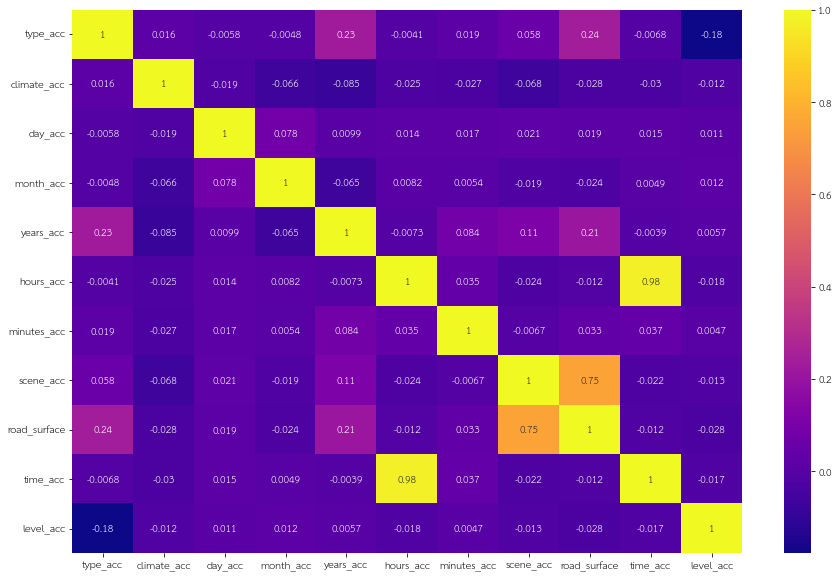

In [42]:
# plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_Htm.corr(), annot=True, cmap="plasma")
plt.show

In [43]:
# ลบคอลัมน์ทั้งสองทิ้งเนื่องจากไม่ได้มีความสัมพันธ์มากนัก
df = df.drop(columns=["hours_acc"])
df = df.drop(columns=["minutes_acc"])

--------------------------------

#Data preprocessing และ เปรียบเทียบ model 

In [44]:
# copy df to df_select
df_select = df.copy()

# ลบคอลัมน์ที่ไม่ใช้งาน
df_select.drop(columns=["route_acc"], inplace=True, axis=1)

In [45]:
df_select

,type_acc,climate_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc,level_acc
0,NaN,แจ่มใส,1,1,2019,อื่นๆ,None,0,INJ
1,อื่นๆ,แจ่มใส,1,1,2019,ทางตรง,None,1,ACC
2,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,แจ่มใส,1,1,2019,ทางตรง,ไม่มีความลาดชัน,2,ACC
3,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,แจ่มใส,1,1,2019,ทางตรง,ไม่มีความลาดชัน,3,ACC
4,รถปิคอัพบรรทุก 4 ล้อ,แจ่มใส,1,1,2019,ทางตรง,ไม่มีความลาดชัน,3,INJ
...,...,...,...,...,...,...,...,...,...
5727,NaN,ฝนตก,29,9,2022,ทางตรง,None,4,ACC
5728,NaN,แจ่มใส,30,9,2022,ทางโค้งกว้าง,None,1,ACC
5729,รถปิคอัพบรรทุก 4 ล้อ,แจ่มใส,30,9,2022,ทางตรง,ไม่มีความลาดชัน,3,ACC
5730,NaN,แจ่มใส,30,9,2022,ทางตรง,None,3,ACC


In [46]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type_acc      5060 non-null   object
 1   climate_acc   5732 non-null   object
 2   day_acc       5732 non-null   object
 3   month_acc     5732 non-null   object
 4   years_acc     5732 non-null   object
 5   scene_acc     5312 non-null   object
 6   road_surface  4422 non-null   object
 7   time_acc      5732 non-null   object
 8   level_acc     5732 non-null   object
dtypes: object(9)
memory usage: 403.2+ KB


In [47]:
# แปลงข้อมูลให้เป็น int
df_Htm[['day_acc', 'month_acc', 'years_acc', 'time_acc']] = df_Htm[['day_acc', 'month_acc', 'years_acc', 'time_acc']].astype(str).astype(int)

In [48]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

# สร้างคอลัมน์สำหรับการ encode
df_select['type_acc'] = lab.fit_transform(df_select['type_acc'])
df_select['climate_acc'] = lab.fit_transform(df_select['climate_acc'])
df_select['scene_acc'] = lab.fit_transform(df_select['scene_acc'])
df_select['road_surface'] = lab.fit_transform(df_select['road_surface'])
df_select

,type_acc,climate_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc,level_acc
0,13,3,1,1,2019,11,2,0,INJ
1,12,3,1,1,2019,1,2,1,ACC
2,9,3,1,1,2019,1,1,2,ACC
3,9,3,1,1,2019,1,1,3,ACC
4,7,3,1,1,2019,1,1,3,INJ
...,...,...,...,...,...,...,...,...,...
5727,13,0,29,9,2022,1,2,4,ACC
5728,13,3,30,9,2022,9,2,1,ACC
5729,7,3,30,9,2022,1,1,3,ACC
5730,13,3,30,9,2022,1,2,3,ACC


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [50]:
# เตรียมชุดข้อมูลสำหรับทำ model
x = df_select.drop(columns=["level_acc"])
y = df_select['level_acc']

In [51]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.4, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3439, 8), (3439,), (2293, 8), (2293,))

In [52]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred_score = lg.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred_score = rf.score(x_test,y_test)

In [54]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred_score = gb.score(x_test,y_test)

In [55]:
gb.feature_importances_

array([0.40911659, 0.03107986, 0.14603521, 0.14149643, 0.05768678,
       0.03510333, 0.0537748 , 0.125707  ])

In [56]:
importances = gb.feature_importances_
columns = x.columns
i = 0

while i<len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i += 1

 The importance of feature 'type_acc' is 40.91%.
 The importance of feature 'climate_acc' is 3.11%.
 The importance of feature 'day_acc' is 14.6%.
 The importance of feature 'month_acc' is 14.15%.
 The importance of feature 'years_acc' is 5.77%.
 The importance of feature 'scene_acc' is 3.51%.
 The importance of feature 'road_surface' is 5.38%.
 The importance of feature 'time_acc' is 12.57%.


In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred_score = svc.score(x_test,y_test)

In [58]:
df_select = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest',
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score,
                                               gb_pred_score, svc_pred_score]))

In [59]:
df_select

,model,accuracy
0,Logistic Regression,0.656782
1,Random Forest,0.641518
2,Gradient Boosting,0.674226
3,SVM,0.654601


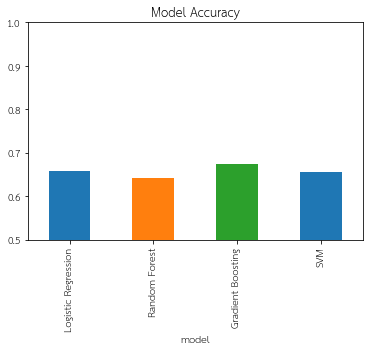

In [60]:
df_select.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

--------------------------

# Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [62]:
# copy df to df_select
df_model = df.copy()

# ลบคอลัมน์ที่ไม่ใช้งาน
df_model.drop(columns=["route_acc"], inplace=True, axis=1)

In [63]:
df_model

,type_acc,climate_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc,level_acc
0,NaN,แจ่มใส,1,1,2019,อื่นๆ,None,0,INJ
1,อื่นๆ,แจ่มใส,1,1,2019,ทางตรง,None,1,ACC
2,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,แจ่มใส,1,1,2019,ทางตรง,ไม่มีความลาดชัน,2,ACC
3,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,แจ่มใส,1,1,2019,ทางตรง,ไม่มีความลาดชัน,3,ACC
4,รถปิคอัพบรรทุก 4 ล้อ,แจ่มใส,1,1,2019,ทางตรง,ไม่มีความลาดชัน,3,INJ
...,...,...,...,...,...,...,...,...,...
5727,NaN,ฝนตก,29,9,2022,ทางตรง,None,4,ACC
5728,NaN,แจ่มใส,30,9,2022,ทางโค้งกว้าง,None,1,ACC
5729,รถปิคอัพบรรทุก 4 ล้อ,แจ่มใส,30,9,2022,ทางตรง,ไม่มีความลาดชัน,3,ACC
5730,NaN,แจ่มใส,30,9,2022,ทางตรง,None,3,ACC


In [64]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

# สร้างคอลัมน์สำหรับการ encode
df_model['type_acc'] = lab.fit_transform(df_model['type_acc'])
df_model['climate_acc'] = lab.fit_transform(df_model['climate_acc'])
df_model['scene_acc'] = lab.fit_transform(df_model['scene_acc'])
df_model['road_surface'] = lab.fit_transform(df_model['road_surface'])

In [65]:
# เตรียมชุดข้อมูลสำหรับทำ model
X= df_model.drop(columns=["level_acc"])
Y = df_model['level_acc']

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.4, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3439, 8), (3439,), (2293, 8), (2293,))

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [68]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and test sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.698
Accuracy score (test): 0.660

Learning rate:  0.1
Accuracy score (training): 0.718
Accuracy score (test): 0.677

Learning rate:  0.25
Accuracy score (training): 0.719
Accuracy score (test): 0.679

Learning rate:  0.5
Accuracy score (training): 0.721
Accuracy score (test): 0.680

Learning rate:  0.75
Accuracy score (training): 0.722
Accuracy score (test): 0.677

Learning rate:  1
Accuracy score (training): 0.715
Accuracy score (test): 0.679



In [69]:
# Learning rate = 0.25
# Output confusion matrix and classification report of Gradient Boosting algorithm on test set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.25, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))

Confusion Matrix:
[[1450    0   51]
 [  32    1   14]
 [ 631    8  106]]

Classification Report
              precision    recall  f1-score   support

         ACC       0.69      0.97      0.80      1501
         DIE       0.11      0.02      0.04        47
         INJ       0.62      0.14      0.23       745

    accuracy                           0.68      2293
   macro avg       0.47      0.38      0.36      2293
weighted avg       0.65      0.68      0.60      2293



-------------------------------

# Accident prediction

In [71]:
def input_data(type_acc,climate_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc):
  df1 = pd.DataFrame({'type_acc': [type_acc],
                   'climate_acc': [climate_acc],
                   'day_acc': [day_acc],
                   'month_acc':[month_acc],
                   'years_acc': [years_acc],
                   'scene_acc': [scene_acc],
                   'road_surface': [road_surface],
                   'time_acc': [time_acc]})
  return df1

In [72]:
def clean_data2(df1):
  clean_df = input

  lab = LabelEncoder()
  clean_df['type_acc'] = lab.fit_transform(clean_df['type_acc'])
  clean_df['climate_acc'] = lab.fit_transform(clean_df['climate_acc'])
  clean_df['scene_acc'] = lab.fit_transform(clean_df['scene_acc'])
  clean_df['road_surface'] = lab.fit_transform(clean_df['road_surface'])

  return clean_df

In [83]:
#@markdown <h3> กรอกข้อมูลการเกิดอุบัติเหตุ </h3>
type_acc = "\u0E23\u0E16\u0E1B\u0E34\u0E04\u0E2D\u0E31\u0E1E\u0E42\u0E14\u0E22\u0E2A\u0E32\u0E23" #@param ['รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ', 'รถปิคอัพบรรทุก 4 ล้อ','รถจักรยานยนต์','รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)','รถบรรทุก 6 ล้อ','รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ','รถตู้','รถโดยสารขนาดใหญ่','รถปิคอัพโดยสาร','อื่นๆ']{allow-input: true}                            
climate_acc =  "\u0E41\u0E08\u0E48\u0E21\u0E43\u0E2A"#@param ['แจ่มใส', 'ฝนตก', 'มืดครึ้ม', 'อื่นๆ'] {allow-input: true}
day_acc    =  "24"#@param['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23','24', '25', '26', '27', '28', '29', '30', '31'] {allow-input: true}
month_acc =  "7"#@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] {allow-input: true}
years_acc =  "2022"#@param['2019', '2020', '2021', '2022']{allow-input: true}
scene_acc	 =  "\u0E17\u0E32\u0E07\u0E15\u0E23\u0E07"#@param['อื่นๆ', 'ทางตรง', 'ทางโค้งกว้าง', 'ทางแยกต่างระดับ/Ramps','ทางเชื่อมเข้าพื้นที่สาธารณะ/เชิงพาณิชย์', 'ทางโค้งหักศอก','ทางสามแยก (Y)', 'ทางร่วม', 'ทางสามแยก (T)', 'จุดกลับรถต่างระดับ','ทางเชื่อมเข้าพื้นที่ส่วนบุคคล', 'ทางสี่แยก'] {allow-input: true}
road_surface	 = "\u0E44\u0E21\u0E48\u0E21\u0E35\u0E04\u0E27\u0E32\u0E21\u0E25\u0E32\u0E14\u0E0A\u0E31\u0E19" #@param ['ไม่มีความลาดชัน', 'ที่ลาดชัน'] {allow-input: true}
time_acc = "4"#@param['0', '1', '2', '3', '4'] {allow-input: true}
# Rental_Yield	 =  3.75#@param {type:"number"} {allow-input: true}
input = input_data(type_acc, climate_acc, day_acc ,month_acc, years_acc , scene_acc,road_surface, time_acc )
clean_input = clean_data2(input)
# clean_df2=clean_df.drop('Sale_Price_Sqm', axis=1).copy()
# clean_input1= clean_input1.reindex(labels=clean_df2.columns,axis=1)
# clean_input2 = clean_input1.fillna(0)
# clean_input3 = scaler.transform(clean_input2)
predictions = gb.predict(clean_input)
# predict = rdfr2.predict(clean_input3)
print('ระดับความรุนแรงของอุบัติเหตุ =', predictions)

ระดับความรุนแรงของอุบัติเหตุ = ['ACC']


----------------

#เตรียมชุดข้อมูลสำหรับการทำ Association Rule Mining

In [74]:
df_ARM = df.copy()

In [77]:
# Filter all rows with  level_acc 
df_ARM1 = df_ARM.query(" level_acc == 'DIE' ")
df_ARM2 = df_ARM.query(" level_acc == 'INJ' ")
df_ARM3 = df_ARM.query(" level_acc == 'ACC' ")

In [78]:
df_ARM1

,route_acc,type_acc,climate_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc,level_acc
97,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถจักรยานยนต์,แจ่มใส,16,1,2019,ทางตรง,ไม่มีความลาดชัน,1,DIE
133,สะพานภูมิพลที่ 1 ไปสะพานภูมิพลที่ 2,รถจักรยานยนต์,มืดครึ้ม,22,1,2019,ทางโค้งกว้าง,ไม่มีความลาดชัน,4,DIE
223,สะพานภูมิพลที่ 1 ไปสะพานภูมิพลที่ 2,รถจักรยานยนต์,มืดครึ้ม,13,2,2019,ทางตรง,ไม่มีความลาดชัน,0,DIE
238,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,แจ่มใส,16,2,2019,ทางตรง,ไม่มีความลาดชัน,0,DIE
387,คลองพระยาสุเรนทร์ - บางพลี,รถจักรยานยนต์,แจ่มใส,25,3,2019,ทางตรง,ไม่มีความลาดชัน,1,DIE
...,...,...,...,...,...,...,...,...,...,...
5437,อรุณอมรินทร์ - พุทธมณฑลสาย 4,คนเดินเท้า,แจ่มใส,5,8,2022,ทางตรง,ไม่มีความลาดชัน,3,DIE
5562,สะพานภูมิพลที่ 1 ไปสะพานภูมิพลที่ 2,รถจักรยานยนต์,แจ่มใส,29,8,2022,ทางตรง,ที่ลาดชัน,4,DIE
5617,จุดเชื่อมต่อสะพานภูมิพลที่ 1 เข้าถนนวงแหวนอุตส...,รถจักรยานยนต์,แจ่มใส,9,9,2022,ทางแยกต่างระดับ/Ramps,None,3,DIE
5655,แขวงรามอินทรา - บางพลี,รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ,แจ่มใส,17,9,2022,ทางตรง,ไม่มีความลาดชัน,1,DIE


In [79]:
# ลบคอลัมน์ที่ไม่ใช้งาน
df_ARM1.drop('level_acc', inplace=True, axis=1)
df_ARM2.drop('level_acc', inplace=True, axis=1)
df_ARM3.drop('level_acc', inplace=True, axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
from google.colab import files
df_ARM1.to_csv('level_acc_DIE.csv') 
files.download('level_acc_DIE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
df_ARM2.to_csv('level_acc_INJ.csv') 
files.download('level_acc_INJ.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
df_ARM3.to_csv('level_acc_ACC.csv') 
files.download('level_acc_ACC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>